In [1]:
import biofeatures
import biosignalsnotebooks as bsnb

data, header = bsnb.load("Sensor data/ECG.h5", get_header=True)

sampling_rate = header["sampling rate"]
channel = list(data.keys())[1]

signal = data[channel]

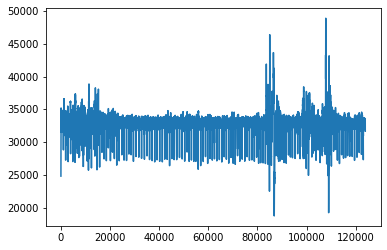

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(signal)

In [21]:
r_peaks, rr_intervals = biofeatures.r_peak_intervals(data = signal, sampling_rate = sampling_rate)
print(rr_intervals[:10])

[ 826  920 1007  998  511  383  325  630  902  270]


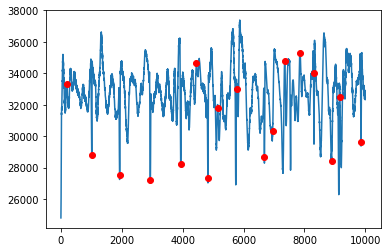

In [20]:
plt_peaks = (np.array(r_peaks[0][:17]) * sampling_rate).astype(int)

plt.figure()
plt.plot(signal[: sampling_rate * 10])
plt.plot(plt_peaks, signal[plt_peaks], 'ro')


In [22]:
features = biofeatures.hrv_features(rr_intervals)

print(features)

{'nni_mean': 824.9194630872483, 'hr_mean': 84.33210854982532, 'hr_std': 45.02873656098175, 'rmssd': 205.39020214006106, 'lf': 6004.521268964863, 'hf': 4781.092420945251, 'LF/HF ratio': 1.2558889768915473}


In [2]:
HRV = biofeatures.hrv(signal, srate = sampling_rate)

In [3]:
HRV.srate

1000

In [4]:
HRV.r_peak_intervals(HRV.data)

In [5]:
HRV.r_intervals

array([ 826,  920, 1007,  998,  511,  383,  325,  630,  902,  270,  393,
        503,  472,  567,  276,  693,  843,  590,  224,  909, 1120,  421,
        719, 1072,  951,  861,  928,  806,  851,  818,  784,  967, 1025,
       1034,  922, 1008,  952,  920,  936, 1027, 1146, 1136, 1167, 1051,
       1042, 1056, 1033,  961, 1061, 1081,  990,  976,  992,  975,  857,
       1059, 1137, 1077, 1042,  980,  849,  911,  966,  829,  951, 1029,
       1034,  917,  893,  924,  957,  878,  966, 1025,  993,  967,  899,
        960,  926,  864,  873,  933,  901,  999, 1029,  966,  946,  981,
       1005,  940,  807,  843,  957,  958,  382,  591,  222,  575,  500,
        417,  738,  879,  888,  822,  755,  827,  876,  934,  766,  833,
       1067, 1057,  995,  969,  492,  393,  710,  246,  987,  980,  437,
        442,  830,  867,  794,  878,  907,  517,  388,  653,  385,  370,
        225,  269,  892,  772,  784,  837,  865,  784,  850,  826,  855,
        996,  958, 1001,  895,  922,  754])

In [6]:
HRV.hrv_features()

In [7]:
HRV.features

[{'nni_mean': 824.9194630872483,
  'hr_mean': 84.33210854982532,
  'hr_std': 45.02873656098175,
  'rmssd': 205.39020214006106,
  'lf': 6004.521268964863,
  'hf': 4781.092420945251,
  'LF/HF ratio': 1.2558889768915473}]

In [8]:
HRV.feature_names

dict_keys(['nni_mean', 'hr_mean', 'hr_std', 'rmssd', 'lf', 'hf', 'LF/HF ratio'])

In [9]:
HRV.detect_trends()

In [10]:
HRV.features = HRV.features + HRV.features

In [11]:
HRV.features

[{'nni_mean': 824.9194630872483,
  'hr_mean': 84.33210854982532,
  'hr_std': 45.02873656098175,
  'rmssd': 205.39020214006106,
  'lf': 6004.521268964863,
  'hf': 4781.092420945251,
  'LF/HF ratio': 1.2558889768915473},
 {'nni_mean': 824.9194630872483,
  'hr_mean': 84.33210854982532,
  'hr_std': 45.02873656098175,
  'rmssd': 205.39020214006106,
  'lf': 6004.521268964863,
  'hf': 4781.092420945251,
  'LF/HF ratio': 1.2558889768915473}]

In [12]:
HRV.detect_trends()

In [13]:
HRV.current_trends

{'nni_mean': 0.0,
 'hr_mean': -7.105427357601002e-15,
 'hr_std': 0.0,
 'rmssd': -2.842170943040401e-14,
 'lf': -9.094947017729282e-13,
 'hf': -9.094947017729282e-13,
 'LF/HF ratio': 0.0}